#**1. Dataset description and preprocessing**

##*1.1 Introduction and data source*

The dataset is sourced from AIcrowd competition:
https://www.aicrowd.com/challenges/epfl-ml-road-segmentation/dataset_files. It contains 100 aerial images acquired from GoogleMaps with corresponding ground-truth images where each pixel is labeled as {road, background}.

The goal is to train a classifier to segment roads in these images, i.e. assign a label {road=1, background=0} to each pixel.


##*1.2 Data augmentation*

Because we only have 100 observations, we need to  synthesize new training examples by copying and manipulating the images we've already got. We rotate and shift original aerial  images and label images simultaneoulsy.

In [ ]:
from PIL import Image
import os

#Rotate the aerial images
dir_path = '/content/drive/Shareddrives/BA865/BA865 project folder/training/images'
# Loop through each file in the directory
for file_name in os.listdir(dir_path):
    # Check if the file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Open the image file
        img_path = os.path.join(dir_path, file_name)
        img = Image.open(img_path)

        # Perform the desired transformations on the image
        # Rotate the image by 90 degrees
        img = img.rotate(90)

        # Save the transformed image to a new file
        new_file_name = file_name[:-4] + '_rotated.png'
        new_img_path = os.path.join('/content/drive/Shareddrives/BA865/BA865 project folder/training/augmented images', new_file_name)
        img.save(new_img_path)

#Rotate the aerial label images
dir_path = '/content/drive/Shareddrives/BA865/BA865 project folder/training/groundtruth'
# Loop through each file in the directory
for file_name in os.listdir(dir_path):
    # Check if the file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Open the image file
        img_path = os.path.join(dir_path, file_name)
        img = Image.open(img_path)

        # Perform the desired transformations on the image
        # Rotate the image by 90 degrees
        img = img.rotate(90)

        # Save the transformed image to a new file
        new_file_name = file_name[:-4] + '_rotated.png'
        new_img_path = os.path.join('/content/drive/Shareddrives/BA865/BA865 project folder/training/augmented groundtruth', new_file_name)
        img.save(new_img_path)

#Shift the aerial images horizontally
dir_path = '/content/drive/Shareddrives/BA865/BA865 project folder/training/images'
# Loop through each file in the directory
for file_name in os.listdir(dir_path):
    # Check if the file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Open the image file
        img_path = os.path.join(dir_path, file_name)
        img = Image.open(img_path)

        # Perform the desired transformations on the image
        # Shift the image horizontally by 80 pixels
        img = img.transform(
            img.size,
            Image.AFFINE,
            (1, 0, 80, 0, 1, 0)
        )

        # Save the transformed image to a new file
        new_file_name = file_name[:-4] + '_shifted.png'
        new_img_path = os.path.join('/content/drive/Shareddrives/BA865/BA865 project folder/training/augmented images2', new_file_name)
        img.save(new_img_path)

#Shift the label images horizontally
dir_path = '/content/drive/Shareddrives/BA865/BA865 project folder/training/groundtruth'
# Loop through each file in the directory
for file_name in os.listdir(dir_path):
    # Check if the file is an image file
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Open the image file
        img_path = os.path.join(dir_path, file_name)
        img = Image.open(img_path)

        # Perform the desired transformations on the image
        # Shift the image horizontally by 80 pixels
        img = img.transform(
            img.size,
            Image.AFFINE,
            (1, 0, 80, 0, 1, 0)
        )

        # Save the transformed image to a new file
        new_file_name = file_name[:-4] + '_shifted.png'
        new_img_path = os.path.join('/content/drive/Shareddrives/BA865/BA865 project folder/training/augmented groundtruth2', new_file_name)
        img.save(new_img_path)

##*1.3 Importing library and loading dataset*

After data augmentation, we copied synthesized ones into original folder and loaded the whole dataset, created two datasets with batch size 1 and did not shuffle them. After that, we zipped images and labels together, shuffled them and split into train and validation dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image as im #load images from files, and to create new images.
from IPython.display import Image #Create a PNG/JPEG/GIF image object given raw data.

In [ ]:
#import images from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import glob
from PIL import Image

base_path = ('/content/drive/Shareddrives/BA865/BA865 project folder/')

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.data import Dataset

train_dataset = image_dataset_from_directory(base_path + 'training/images final', label_mode=None, batch_size=1,image_size=(400, 400), shuffle=False)
labels_dataset = image_dataset_from_directory(base_path + 'training/groundtruth final',label_mode = None, batch_size=1,image_size=(400, 400), shuffle=False, color_mode='grayscale')

# zipping
zipped_ds = Dataset.zip((train_dataset, labels_dataset))

for image,label in zipped_ds:
  print(image.shape)
  print(label.shape) # We have grayscale images but they are just going to be the same array replicated 3 times.
  break

zipped_ds = zipped_ds.shuffle(300) # Shuffle over our 100 image-segmentation mask pairs.

train_ds = zipped_ds.take(240) # First 240 images to go training
validation_ds = zipped_ds.skip(240) # Last 240 images go to validation.

Found 300 files belonging to 1 classes.
Found 300 files belonging to 1 classes.
(1, 400, 400, 3)
(1, 400, 400, 1)


##*1.4 Histogram of data*

We plotted histograms of pixel values in aerial images and label images. We found that pixel values in label images centers on 0 and 237, with a few noises around them, and there is an imbalance within them, with nearly 75% of 0s.



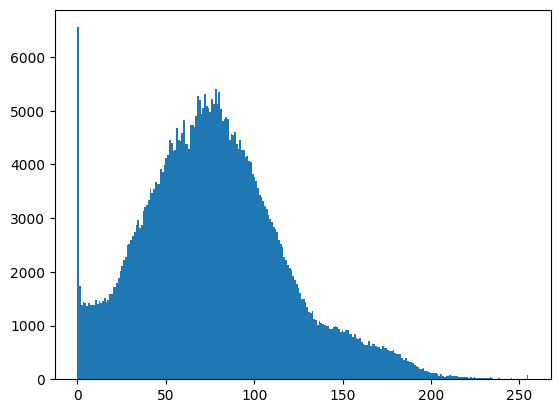

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

for image, label in train_ds:
  train_images = image
  train_labels = label
  train_vector = np.reshape(image[0],-1)
  label_vector = np.reshape(label[0],-1)
  plt.hist(train_vector, bins=256)
  plt.title="Histogram of Pixel Values"
  plt.show()
  break

In [ ]:
pd.DataFrame(train_vector).describe()

,0
count,480000.00000
mean,77.59903
std,41.14045
min,0.00000
25%,49.00000
50%,75.00000
75%,101.00000
max,255.00000


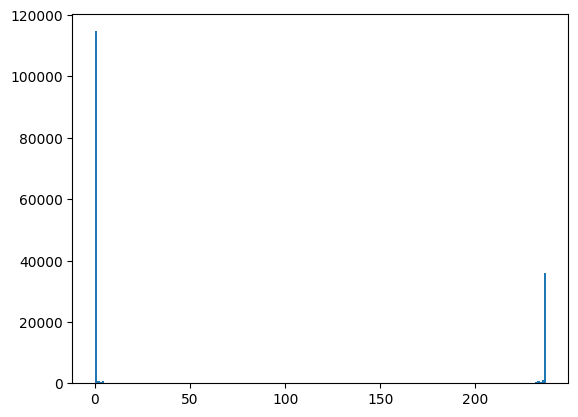

,0
count,160000.000000
mean,60.646511
std,102.413452
min,0.000000
25%,0.000000
50%,0.000000
75%,191.250000
max,237.000000


In [ ]:
plt.hist(label_vector, bins=255)
plt.title="Histogram of Pixel Values"
plt.show()
pd.DataFrame(label_vector).describe()

##*1.5 Visualisation of train image and its label*

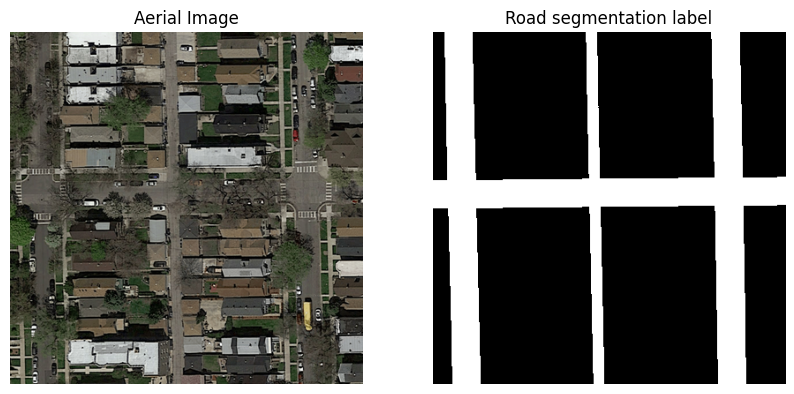

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(train_images[0]/255)
ax2.imshow(train_labels[0]/255,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation label')

# Show the figure
plt.show()

##*1.6 Rescaling and bucketing labels' pixels to 0 or 1*

In [ ]:
from tensorflow import keras
# Create rescale layer
rescale_layer = keras.layers.Rescaling(scale=1./237)

# Create custom bin boundaries
bin_boundaries = [0.5]
# Create discretization layer with custom bin boundaries
discretization_layer = keras.layers.Discretization(bin_boundaries=bin_boundaries)


train_ds = train_ds.map(
    lambda x, y: (x, discretization_layer(rescale_layer(y))))

validation_ds = validation_ds.map(
    lambda x, y: (x, discretization_layer(rescale_layer(y))))

#**2. Model 1: Simple Dense NN**

##*2.1 Setting Model Configuration*

In the dense NN model, we first used a rescaling layer to convert the values into floats with a range 0 - 1, then flattened the input arrays into a vector, after that there are two dense layers with units of 256 each and relu as activation function, then a sigmoid activation to predict the output lable. In the end, we reshaped them back into 400*400 pixel grayscale image.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(400,400,3,)),
    layers.Rescaling(1./255),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(160000, activation="sigmoid"),
    layers.Reshape((400,400,1))
])

Next, we will indicate some configuration parameters. In particular, what optimization algorithm to use (RMSProp), what loss function to use (binary cross-entropy because we have binary outcome variables), and what metric to optimize on (accuracy).

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 400, 400, 3)       0         
                                                                 
 flatten (Flatten)           (None, 480000)            0         
                                                                 
 dense (Dense)               (None, 256)               122880256 
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 160000)            41120000  
                                                                 
 reshape (Reshape)           (None, 400, 400, 1)       0         
                                                                 
Total params: 164,066,048
Trainable params: 164,066,048


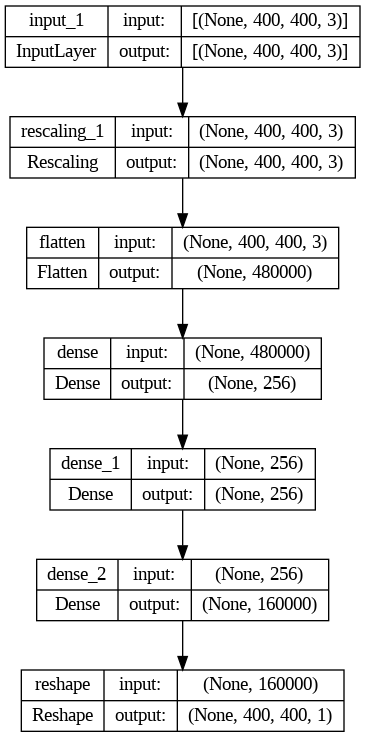

In [ ]:
#Plot the model flowchart
keras.utils.plot_model(model, show_shapes=True)

##*2.2 Fitting the model and plotting the accuracy and loss*

In [ ]:
history = model.fit(train_ds, validation_data=validation_ds, epochs=50,shuffle=True)

Epoch 1/50
240/240 [==============================] - 86s 49ms/step - loss: 0.5342 - accuracy: 0.7818 - val_loss: 0.5492 - val_accuracy: 0.7978
Epoch 2/50
240/240 [==============================] - 14s 48ms/step - loss: 0.4991 - accuracy: 0.8104 - val_loss: 0.4674 - val_accuracy: 0.8152
Epoch 3/50
240/240 [==============================] - 14s 48ms/step - loss: 0.4817 - accuracy: 0.8141 - val_loss: 0.4607 - val_accuracy: 0.8198
Epoch 4/50
240/240 [==============================] - 16s 47ms/step - loss: 0.4847 - accuracy: 0.8103 - val_loss: 0.4805 - val_accuracy: 0.8032
Epoch 5/50
240/240 [==============================] - 14s 48ms/step - loss: 0.4751 - accuracy: 0.8136 - val_loss: 0.4793 - val_accuracy: 0.8070
Epoch 6/50
240/240 [==============================] - 12s 42ms/step - loss: 0.4758 - accuracy: 0.8105 - val_loss: 0.4633 - val_accuracy: 0.8163
Epoch 7/50
240/240 [==============================] - 14s 48ms/step - loss: 0.4699 - accuracy: 0.8111 - val_loss: 0.4958 - val_accuracy:

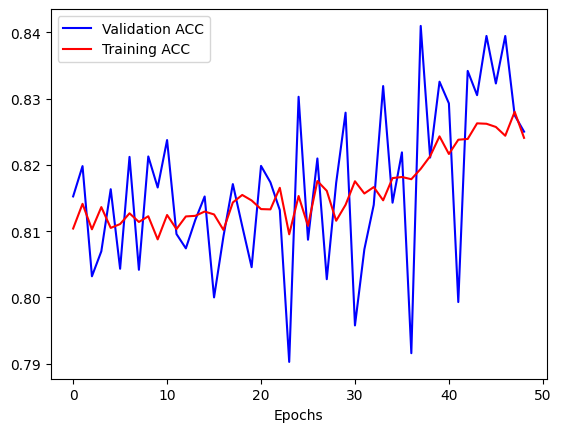

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy

plt.plot(history.history['val_accuracy'][1:],c="b")
plt.plot(history.history['accuracy'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation ACC','Training ACC'])
plt.xlabel("Epochs")
plt.show()

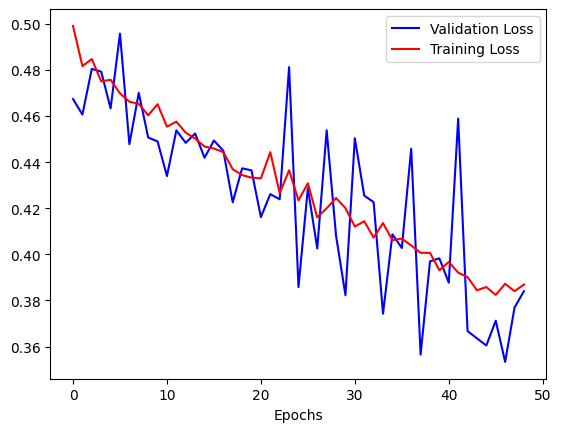

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss

plt.plot(history.history['val_loss'][1:],c="b")
plt.plot(history.history['loss'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation Loss','Training Loss'])
plt.xlabel("Epochs")
plt.show()

##*2.3 Visualising the predicted segmentation*

In [ ]:
# Let's take our batch of validation images to see the predictions
validation_images = []
validation_labels = []
for image, label in validation_ds:
  validation_images.append(image)
  validation_labels.append(label)

1/1 [==============================] - 0s 28ms/step


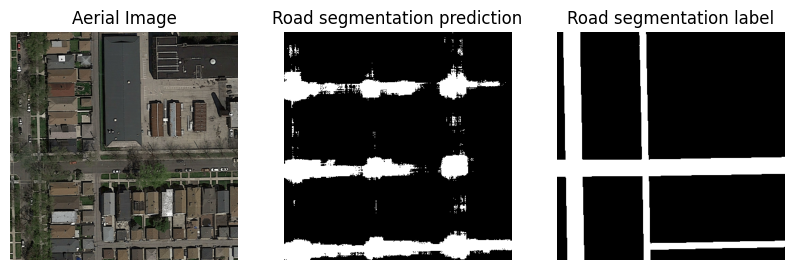

In [ ]:
segmentation = model.predict(validation_images[30])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[30])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[30])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

1/1 [==============================] - 0s 20ms/step


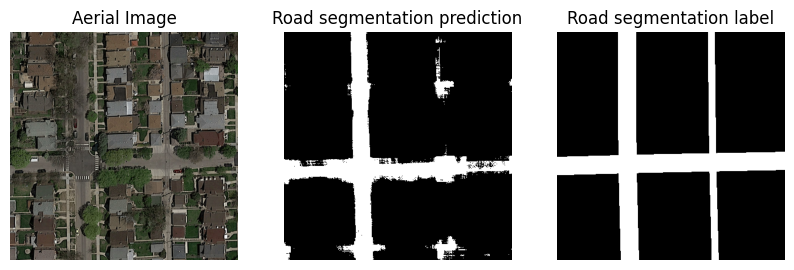

In [ ]:
segmentation = model.predict(validation_images[5])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[5])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[5])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

#**3. Model 2: U-NET (2D CNN)**

##*3.1 Setting Model Configuration and model flowchart*

In [ ]:
'''
Standard Unet
Model not compiled here, instead will be done externally to make it
easy to test various loss functions and optimizers.
'''

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.callbacks import EarlyStopping


################################################################
def multi_unet_model(n_classes=1, IMG_HEIGHT=400, IMG_WIDTH=400, IMG_CHANNELS=3):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

    #Encoder portion
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

    #Decoder portion
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, c1], axis=3)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    outputs = Conv2D(n_classes, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
model_unet = multi_unet_model(n_classes=1, IMG_HEIGHT=400, IMG_WIDTH=400, IMG_CHANNELS=3)
model_unet.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])

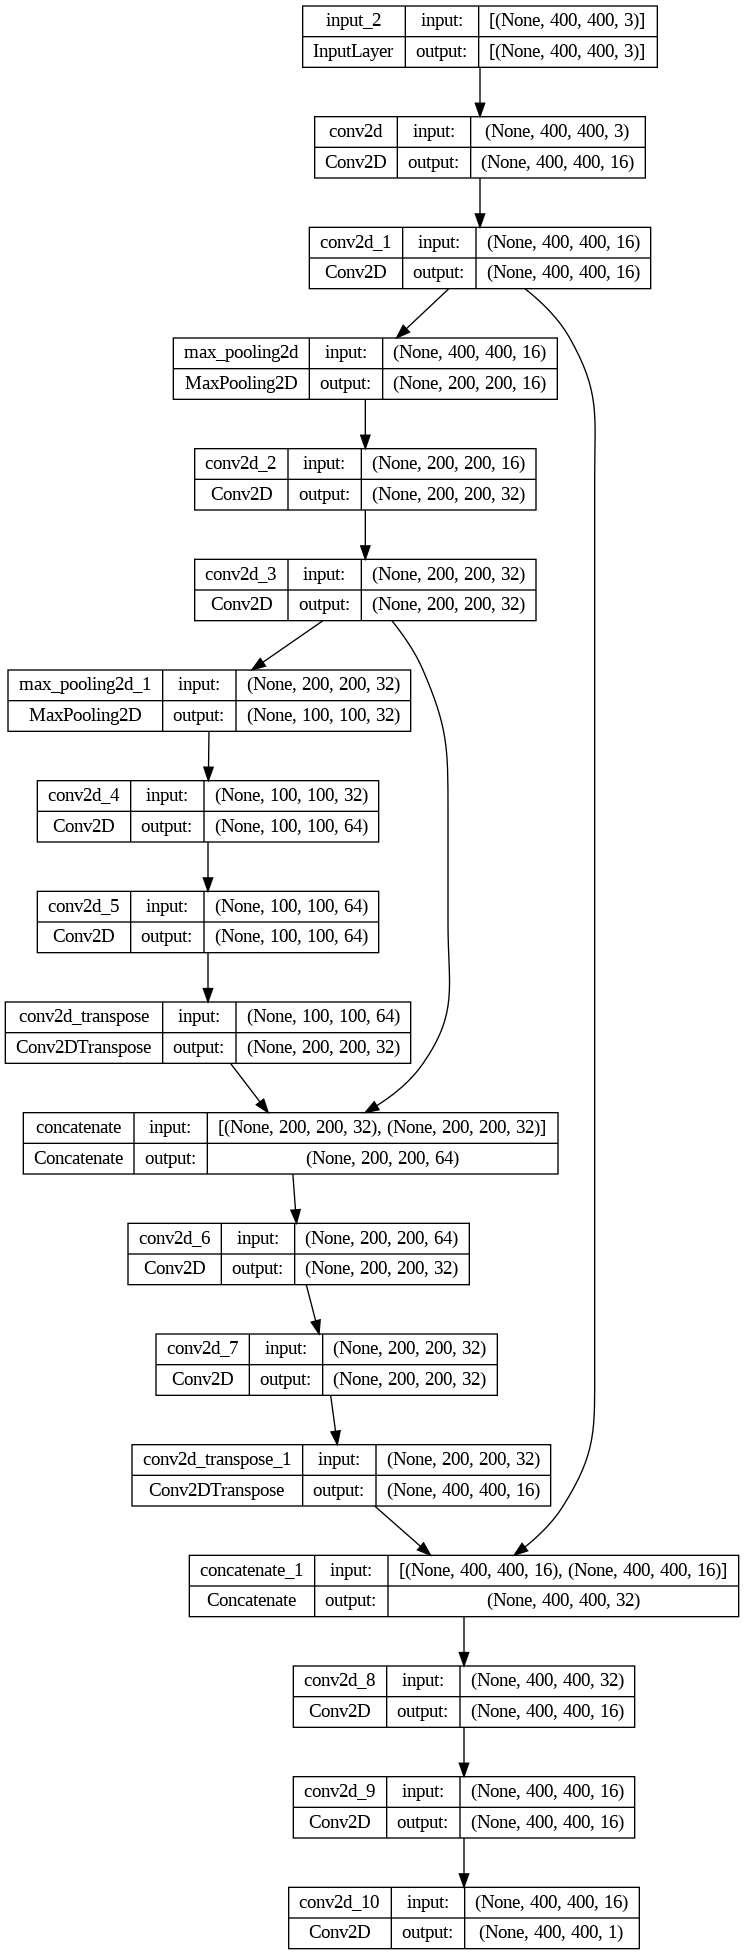

In [ ]:
# Plot the model flowchart
keras.utils.plot_model(model_unet, show_shapes=True)

##*3.2 Fitting the model and plotting the accuracy and loss*

In [ ]:
#Define callbacks
early_stop = EarlyStopping(monitor = 'val_accuracy', mode = 'max', patience=5, restore_best_weights=True)

history = model_unet.fit(train_ds,
                    batch_size = 1,
                    verbose=1,
                    epochs=50,
                    validation_data=validation_ds,
                    shuffle=True,
                    callbacks = [early_stop])

Epoch 1/50
240/240 [==============================] - 19s 30ms/step - loss: 1.4469 - accuracy: 0.7601 - val_loss: 0.4584 - val_accuracy: 0.8161
Epoch 2/50
240/240 [==============================] - 10s 29ms/step - loss: 0.4597 - accuracy: 0.8100 - val_loss: 0.4125 - val_accuracy: 0.8012
Epoch 3/50
240/240 [==============================] - 10s 32ms/step - loss: 0.4168 - accuracy: 0.8123 - val_loss: 0.3902 - val_accuracy: 0.8119
Epoch 4/50
240/240 [==============================] - 10s 32ms/step - loss: 0.3793 - accuracy: 0.8221 - val_loss: 0.4036 - val_accuracy: 0.8083
Epoch 5/50
240/240 [==============================] - 12s 39ms/step - loss: 0.3510 - accuracy: 0.8367 - val_loss: 0.2868 - val_accuracy: 0.8694
Epoch 6/50
240/240 [==============================] - 12s 39ms/step - loss: 0.3519 - accuracy: 0.8428 - val_loss: 0.2997 - val_accuracy: 0.8592
Epoch 7/50
240/240 [==============================] - 13s 39ms/step - loss: 0.3267 - accuracy: 0.8573 - val_loss: 0.2916 - val_accuracy:

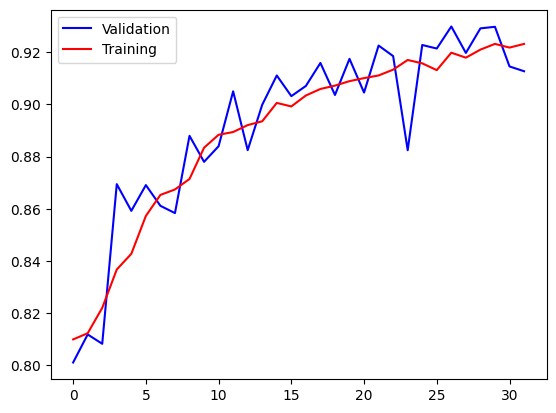

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuracy

plt.plot(history.history['val_accuracy'][1:],c="b")
plt.plot(history.history['accuracy'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation','Training'])
plt.show()

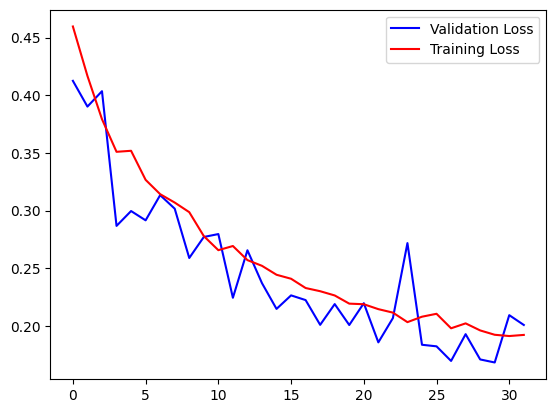

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss

plt.plot(history.history['val_loss'][1:],c="b")
plt.plot(history.history['loss'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation Loss','Training Loss'])
plt.show()

##*3.3 Visualising the predicted segmentation*

We plotted the same images as before to visualize the predicted segmentation based on U-NET model.

1/1 [==============================] - 0s 114ms/step


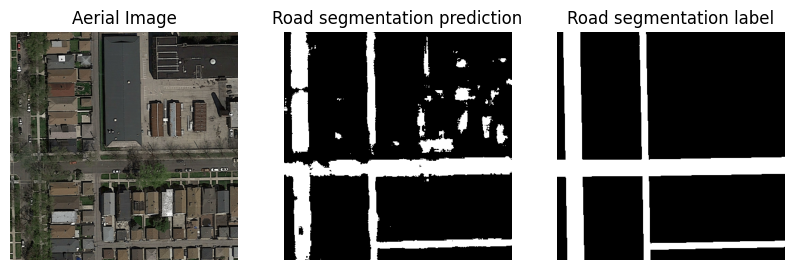

In [ ]:
segmentation = model_unet.predict(validation_images[30])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[30])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[30])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

1/1 [==============================] - 0s 60ms/step


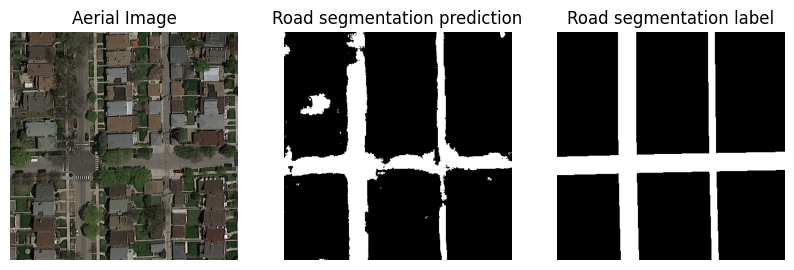

In [ ]:
segmentation = model_unet.predict(validation_images[5])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[5])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[5])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

##*3.4 Plotting Feature maps*

In [ ]:
from tensorflow.keras import layers

layer_outputs = []
layer_names = []

# We are making a 'new' Keras model based on the single prior trained one, but with *many* different output branches.

# Iterate over all the layers in my prior model...
for layer in model_unet.layers:

    # If that layer is a 2D Convolution or a Max Pool layer...
    if isinstance(layer, (layers.Conv2D, layers.MaxPooling2D)):
        print(f'Current layer is {layer.name} and its output shape is {layer.output.shape}')
        # Take that layer's outputs and name and append them to a list (we are going to use all of these as 'different' output layers, across a series of new models)
        layer_outputs.append(layer.output)
        layer_names.append(layer.name)

# Finally, define a new model as the trained model's inputs, mapped to the list of various layer outputs we created above.
# So, the new model takes images as input, and it will spit out a list of outputs (those associated with each successive Conv2D and pooling layer)
featuremap_model = keras.Model(inputs=model_unet.input, outputs=layer_outputs)

Current layer is conv2d and its output shape is (None, 400, 400, 16)
Current layer is conv2d_1 and its output shape is (None, 400, 400, 16)
Current layer is max_pooling2d and its output shape is (None, 200, 200, 16)
Current layer is conv2d_2 and its output shape is (None, 200, 200, 32)
Current layer is conv2d_3 and its output shape is (None, 200, 200, 32)
Current layer is max_pooling2d_1 and its output shape is (None, 100, 100, 32)
Current layer is conv2d_4 and its output shape is (None, 100, 100, 64)
Current layer is conv2d_5 and its output shape is (None, 100, 100, 64)
Current layer is conv2d_transpose and its output shape is (None, 200, 200, 32)
Current layer is conv2d_6 and its output shape is (None, 200, 200, 32)
Current layer is conv2d_7 and its output shape is (None, 200, 200, 32)
Current layer is conv2d_transpose_1 and its output shape is (None, 400, 400, 16)
Current layer is conv2d_8 and its output shape is (None, 400, 400, 16)
Current layer is conv2d_9 and its output shape is

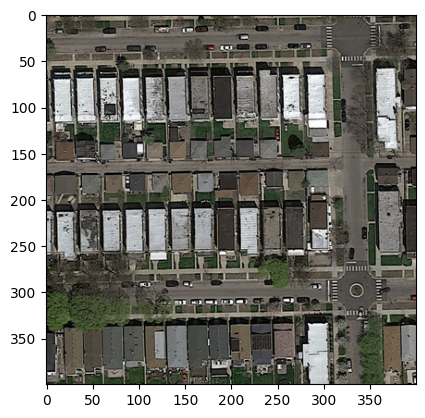

In [ ]:
plt.imshow(tf.squeeze(validation_images[20])/255)

1/1 [==============================] - 0s 19ms/step


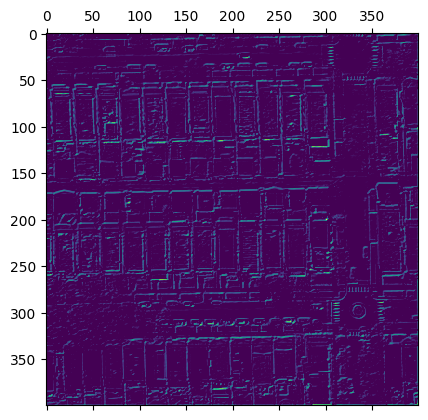

In [ ]:
import matplotlib.pyplot as plt

featuremaps = featuremap_model.predict(validation_images[20])

# What layer, and what filter do we want to look at?
layer = 0
filter = 1

# Let's plot the 1st feature map from the first Convolution layer.
# It seems to be detecting some edges.
plt.matshow(featuremaps[layer][0, :, :, filter], cmap="viridis")
plt.show()

1/1 [==============================] - 0s 27ms/step


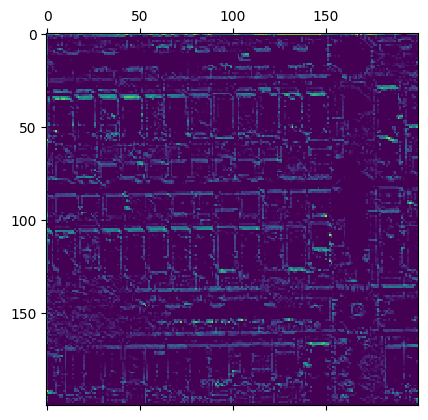

In [ ]:
import matplotlib.pyplot as plt

featuremaps = featuremap_model.predict(validation_images[20])

# What layer, and what filter do we want to look at?
# The second last layer
layer = 2
filter = 2

# Let's plot the feature map from the first Max Pool layer.
# It seems to be detecting some edges.
plt.matshow(featuremaps[layer][0, :, :, filter], cmap="viridis")
plt.show()

1/1 [==============================] - 0s 35ms/step


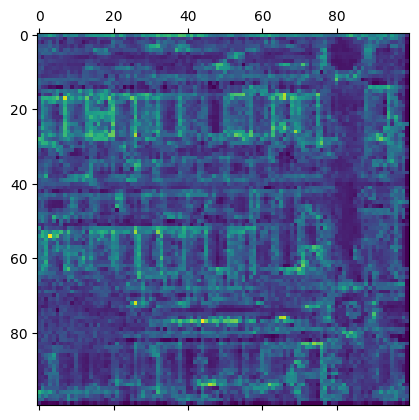

In [ ]:
import matplotlib.pyplot as plt

featuremaps = featuremap_model.predict(validation_images[20])

# What layer, and what filter do we want to look at?
layer = 5
filter = 2

# Let's plot the feature map from the second Max Pool layer.
# It seems to be detecting some edges.
plt.matshow(featuremaps[layer][0, :, :, filter], cmap="viridis")
plt.show()

#**4. Model 3: Pre-trained + U-NET**
To improve our U-NET model performance, we fine-tuned it from a pre-trained model. Here we are going to load the VGG16 convolutional base (the first 3 blocks), and actually use it inside our network (though we will freeze its parameters so we don't try to update them as we go, since that would ruin the model and add lots of computation time).

##*4.1 Setting Model Configuration*

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math
from keras import backend as K

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

#Load the VGG16 convolutional base
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # Throw away the densely connected layer at the end.
    input_shape=(400, 400, 3))

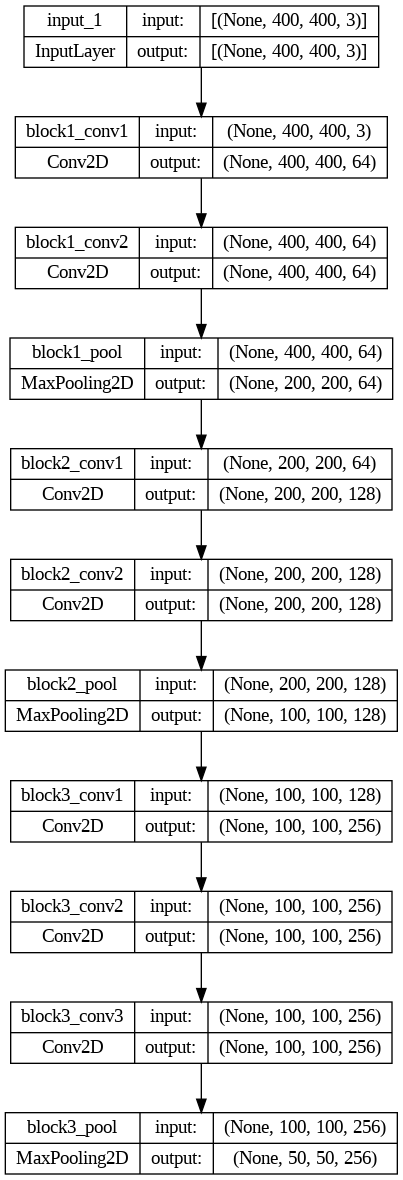

In [ ]:
#Extract the first 3 blocks of VGG16 and show what it looks like
base_model = Model(inputs = conv_base.input, outputs= conv_base.get_layer('block3_pool').output)
keras.utils.plot_model(base_model, show_shapes=True)

In [ ]:
base_model = Model(inputs = conv_base.input, outputs= conv_base.get_layer('block3_pool').output)
base_model.trainable = False
def multi_unet_model_vgg(n_classes=1, IMG_HEIGHT=400, IMG_WIDTH=400, IMG_CHANNELS=3):
#Build the model
    inputs = keras.Input(shape=(400, 400, 3))
    x = inputs
    x = keras.applications.vgg16.preprocess_input(x)
    x = base_model(x)
    # Decoder portion
    x = layers.Conv2DTranspose(256, (3,3), strides=2,activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, (3,3), strides=2,activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(16, (3,3), strides=2, activation="relu", padding="same")(x)
    #Encoder portion
    p1 = MaxPooling2D((2, 2))(x)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    #Decoder portion
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    c4 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, x], axis=3)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    outputs = Conv2D(n_classes, (1, 1), activation='sigmoid')(c5)
    model = Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
model_unet_vgg = multi_unet_model_vgg(n_classes=1, IMG_HEIGHT=400, IMG_WIDTH=400, IMG_CHANNELS=3)
model_unet_vgg.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics=["accuracy"])
model_unet_vgg.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 400, 400, 3  0           []                               
                                )]                                                                
                                                                                                  
 tf.__operators__.getitem (Slic  (None, 400, 400, 3)  0          ['input_2[0][0]']                
 ingOpLambda)                                                                                     
                                                                                                  
 tf.nn.bias_add (TFOpLambda)    (None, 400, 400, 3)  0           ['tf.__operators__.getitem[0][0]'
                                                                 ]                          

##*4.2 Fitting the model and plotting the accuracy and loss*

In [ ]:
history = model_unet_vgg.fit(train_ds,
                    verbose=1,
                    epochs=50,
                    validation_data=validation_ds,
                    shuffle=True)

Epoch 1/50
240/240 [==============================] - 37s 64ms/step - loss: 1.0065 - accuracy: 0.8036 - val_loss: 0.3244 - val_accuracy: 0.8299
Epoch 2/50
240/240 [==============================] - 16s 57ms/step - loss: 0.3372 - accuracy: 0.8452 - val_loss: 0.3013 - val_accuracy: 0.8779
Epoch 3/50
240/240 [==============================] - 16s 57ms/step - loss: 0.2865 - accuracy: 0.8765 - val_loss: 0.2382 - val_accuracy: 0.8966
Epoch 4/50
240/240 [==============================] - 18s 62ms/step - loss: 0.2456 - accuracy: 0.8996 - val_loss: 0.1830 - val_accuracy: 0.9267
Epoch 5/50
240/240 [==============================] - 23s 82ms/step - loss: 0.2203 - accuracy: 0.9096 - val_loss: 0.1676 - val_accuracy: 0.9346
Epoch 6/50
240/240 [==============================] - 16s 57ms/step - loss: 0.2015 - accuracy: 0.9201 - val_loss: 0.1577 - val_accuracy: 0.9324
Epoch 7/50
240/240 [==============================] - 18s 62ms/step - loss: 0.1857 - accuracy: 0.9272 - val_loss: 0.1712 - val_accuracy:

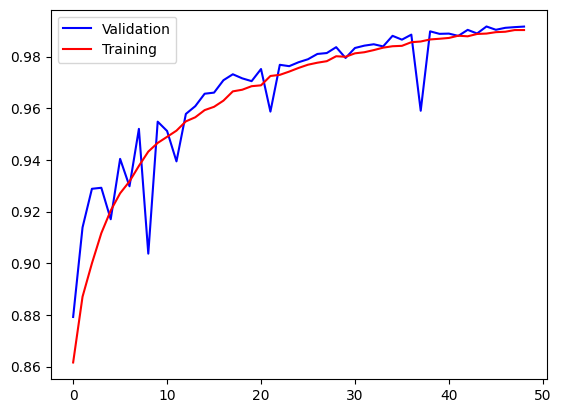

In [ ]:
import matplotlib.pyplot as plt

# Plot the accuray

plt.plot(history.history['val_accuracy'][1:],c="b")
plt.plot(history.history['accuracy'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation','Training'])
plt.show()

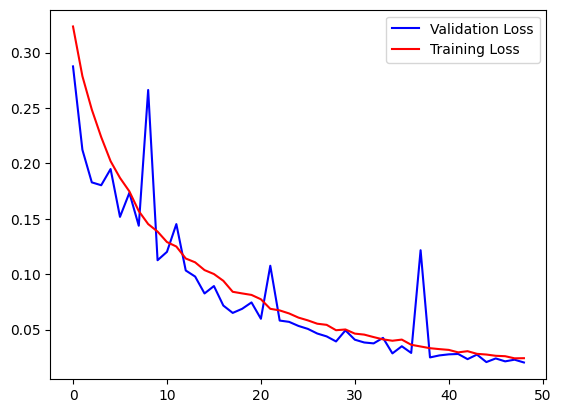

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss

plt.plot(history.history['val_loss'][1:],c="b")
plt.plot(history.history['loss'][1:],c="r")
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.legend(['Validation Loss','Training Loss'])
plt.show()

##*4.3 Visualising the predicted segmentation*


1/1 [==============================] - 0s 181ms/step


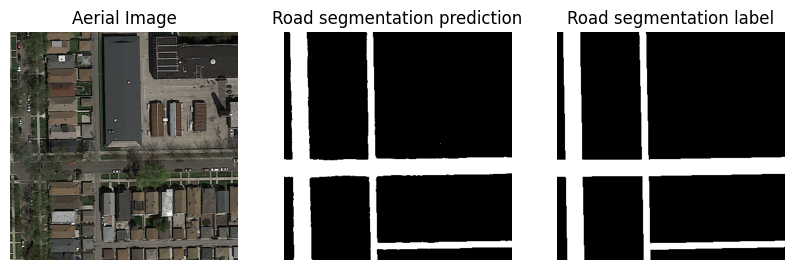

In [ ]:
segmentation = model_unet_vgg.predict(validation_images[30])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[30])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[30])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

1/1 [==============================] - 0s 34ms/step


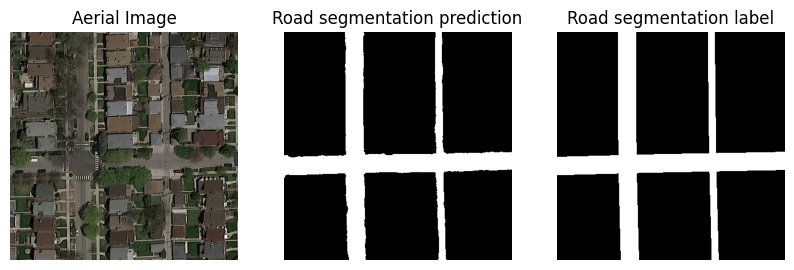

In [ ]:
segmentation = model_unet_vgg.predict(validation_images[5])
segmentation = np.where(segmentation[0] > 0.5, 1, 0)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Display images on the subplots
ax1.imshow(tf.squeeze(validation_images[5])/255)
ax2.imshow(np.round(segmentation),cmap="gray") # if I use np.round it cleans up the segmentation a lot!
ax3.imshow(tf.squeeze(validation_labels[5])/237,cmap="gray")

# Optionally, remove axes
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

# Set optional titles for subplots
ax1.set_title('Aerial Image')
ax2.set_title('Road segmentation prediction')
ax3.set_title('Road segmentation label')

# Show the figure
plt.show()

##*4.4 Grid Search*

We searched through three different filter sizes (3,3),(4,4) and (5,5) for our convolution layers. We found that for 20 epochs, (3,3) gave us the best results with an accuracy of 0.96, and this is the parameter we used previously.


In [ ]:
train_labels_array=[]
train_images_array =[]
for images, labels in train_ds.unbatch():
    train_images_array.append(images)
    train_labels_array.append(labels)

validation_labels_array=[]
validation_images_array =[]
for images, labels in validation_ds.unbatch():
    validation_images_array.append(images)
    validation_labels_array.append(labels)


In [ ]:
train_images_array = np.array(train_images_array)
train_labels_array = np.array(train_labels_array)

validation_images_array = np.array(validation_images_array)
validation_labels_array = np.array(validation_labels_array)

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization

from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K
import keras


base_model.trainable = False
def create_model(cov_filter_size = (3,3)):

    inputs = keras.Input(shape=(400, 400, 3))
    x = inputs
    x = keras.applications.vgg16.preprocess_input(x)
    x = base_model(x)

    # Decoder portion
    x = layers.Conv2DTranspose(256, cov_filter_size, strides=2,activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, cov_filter_size, strides=2,activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(16, cov_filter_size, strides=2, activation="relu", padding="same")(x)

    #Encoder portion
    p1 = MaxPooling2D((2, 2))(x)

    c2 = Conv2D(32, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Conv2D(32, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Conv2D(64, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(c3)

    #Decoder portion
    u4 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c3)
    u4 = concatenate([u4, c2])
    c4 = Conv2D(32, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(u4)
    c4 = Conv2D(32, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(c4)

    u5 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = concatenate([u5, x], axis=3)
    c5 = Conv2D(16, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c5 = Conv2D(16, cov_filter_size, activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c5)

    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer = "rmsprop", loss = "binary_crossentropy" , metrics = ['accuracy'])
    return model

In [ ]:
gridsearch_net = KerasRegressor(build_fn= create_model, cov_filter_size = (3,3))

<ipython-input-17-1b57ce2a0f0f>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  gridsearch_net = KerasRegressor(build_fn= create_model, cov_filter_size = (3,3))


In [ ]:
print(gridsearch_net.get_params().keys())

dict_keys(['cov_filter_size', 'build_fn'])


In [ ]:
# suppress warnings
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [ ]:
from traitlets.traitlets import validate

# Define parameter grid for grid search
param_grid = {
    'cov_filter_size': [(3,3,), (4,4), (5,5)],
}


# Perform grid search using Keras' GridSearchCV
grid_search = GridSearchCV(estimator = gridsearch_net, param_grid=param_grid, cv=3, scoring='accuracy' , verbose=1)
grid_search.fit(train_images_array,train_labels_array, epochs=20, validation_data=(validation_images_array, validation_labels_array), batch_size=1)

# Print best hyperparameters and corresponding loss
best_model = grid_search.best_estimator_
validaiton_score = best_model.score(validation_images_array, validation_labels_array)

print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', -validaiton_score)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Epoch 1/20
160/160 [==============================] - 24s 48ms/step - loss: 0.9458 - accuracy: 0.7947 - val_loss: 0.3435 - val_accuracy: 0.8205
Epoch 2/20
160/160 [==============================] - 7s 44ms/step - loss: 0.3601 - accuracy: 0.8253 - val_loss: 0.3192 - val_accuracy: 0.8390
Epoch 3/20
160/160 [==============================] - 7s 44ms/step - loss: 0.3188 - accuracy: 0.8598 - val_loss: 0.5705 - val_accuracy: 0.8338
Epoch 4/20
160/160 [==============================] - 7s 44ms/step - loss: 0.2962 - accuracy: 0.8779 - val_loss: 0.2443 - val_accuracy: 0.8993
Epoch 5/20
160/160 [==============================] - 7s 45ms/step - loss: 0.2666 - accuracy: 0.8893 - val_loss: 0.2474 - val_accuracy: 0.8875
Epoch 6/20
160/160 [==============================] - 7s 45ms/step - loss: 0.2433 - accuracy: 0.9004 - val_loss: 0.2015 - val_accuracy: 0.9172
Epoch 7/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2280 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 12s 50ms/step - loss: 0.8121 - accuracy: 0.7908 - val_loss: 0.3485 - val_accuracy: 0.8207
Epoch 2/20
160/160 [==============================] - 8s 47ms/step - loss: 0.3635 - accuracy: 0.8277 - val_loss: 0.3120 - val_accuracy: 0.8604
Epoch 3/20
160/160 [==============================] - 7s 46ms/step - loss: 0.3287 - accuracy: 0.8572 - val_loss: 0.3072 - val_accuracy: 0.8554
Epoch 4/20
160/160 [==============================] - 7s 46ms/step - loss: 0.3069 - accuracy: 0.8711 - val_loss: 0.2939 - val_accuracy: 0.8775
Epoch 5/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2858 - accuracy: 0.8842 - val_loss: 0.2700 - val_accuracy: 0.8878
Epoch 6/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2726 - accuracy: 0.8863 - val_loss: 0.2592 - val_accuracy: 0.8928
Epoch 7/20
160/160 [==============================] - 7s 45ms/step - loss: 0.2517 - accuracy: 0.9018 - val_loss: 0.2151 - val_accuracy: 0.917

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 11s 50ms/step - loss: 1.0977 - accuracy: 0.7935 - val_loss: 0.3500 - val_accuracy: 0.8205
Epoch 2/20
160/160 [==============================] - 7s 45ms/step - loss: 0.3561 - accuracy: 0.8310 - val_loss: 0.3196 - val_accuracy: 0.8643
Epoch 3/20
160/160 [==============================] - 7s 46ms/step - loss: 0.3096 - accuracy: 0.8603 - val_loss: 0.3123 - val_accuracy: 0.8673
Epoch 4/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2724 - accuracy: 0.8836 - val_loss: 0.2350 - val_accuracy: 0.8993
Epoch 5/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2386 - accuracy: 0.9006 - val_loss: 0.2135 - val_accuracy: 0.9114
Epoch 6/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2200 - accuracy: 0.9122 - val_loss: 0.2071 - val_accuracy: 0.9166
Epoch 7/20
160/160 [==============================] - 7s 46ms/step - loss: 0.2002 - accuracy: 0.9198 - val_loss: 0.1852 - val_accuracy: 0.928

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 16s 72ms/step - loss: 2.1672 - accuracy: 0.7890 - val_loss: 0.3668 - val_accuracy: 0.8287
Epoch 2/20
160/160 [==============================] - 11s 68ms/step - loss: 0.3683 - accuracy: 0.8372 - val_loss: 0.2967 - val_accuracy: 0.8698
Epoch 3/20
160/160 [==============================] - 10s 62ms/step - loss: 0.3155 - accuracy: 0.8702 - val_loss: 0.2801 - val_accuracy: 0.8777
Epoch 4/20
160/160 [==============================] - 10s 63ms/step - loss: 0.2798 - accuracy: 0.8859 - val_loss: 0.2237 - val_accuracy: 0.9094
Epoch 5/20
160/160 [==============================] - 10s 62ms/step - loss: 0.2441 - accuracy: 0.9029 - val_loss: 0.2189 - val_accuracy: 0.9219
Epoch 6/20
160/160 [==============================] - 11s 68ms/step - loss: 0.2135 - accuracy: 0.9150 - val_loss: 0.1766 - val_accuracy: 0.9328
Epoch 7/20
160/160 [==============================] - 11s 68ms/step - loss: 0.1935 - accuracy: 0.9256 - val_loss: 0.1747 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 15s 73ms/step - loss: 5.3237 - accuracy: 0.7803 - val_loss: 0.3763 - val_accuracy: 0.8200
Epoch 2/20
160/160 [==============================] - 10s 62ms/step - loss: 0.3787 - accuracy: 0.8277 - val_loss: 0.3165 - val_accuracy: 0.8433
Epoch 3/20
160/160 [==============================] - 11s 69ms/step - loss: 0.3328 - accuracy: 0.8523 - val_loss: 0.3496 - val_accuracy: 0.8606
Epoch 4/20
160/160 [==============================] - 10s 62ms/step - loss: 0.2961 - accuracy: 0.8751 - val_loss: 0.2439 - val_accuracy: 0.8984
Epoch 5/20
160/160 [==============================] - 10s 62ms/step - loss: 0.2774 - accuracy: 0.8883 - val_loss: 0.2194 - val_accuracy: 0.9148
Epoch 6/20
160/160 [==============================] - 10s 61ms/step - loss: 0.2469 - accuracy: 0.9018 - val_loss: 0.2052 - val_accuracy: 0.9158
Epoch 7/20
160/160 [==============================] - 10s 61ms/step - loss: 0.2278 - accuracy: 0.9092 - val_loss: 0.1805 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 16s 73ms/step - loss: 1.7917 - accuracy: 0.8012 - val_loss: 0.3875 - val_accuracy: 0.8313
Epoch 2/20
160/160 [==============================] - 10s 62ms/step - loss: 0.3544 - accuracy: 0.8374 - val_loss: 0.2976 - val_accuracy: 0.8742
Epoch 3/20
160/160 [==============================] - 10s 62ms/step - loss: 0.2998 - accuracy: 0.8685 - val_loss: 0.2971 - val_accuracy: 0.8684
Epoch 4/20
160/160 [==============================] - 11s 69ms/step - loss: 0.2660 - accuracy: 0.8913 - val_loss: 0.2525 - val_accuracy: 0.9022
Epoch 5/20
160/160 [==============================] - 10s 63ms/step - loss: 0.2295 - accuracy: 0.9077 - val_loss: 0.2346 - val_accuracy: 0.9090
Epoch 6/20
160/160 [==============================] - 11s 69ms/step - loss: 0.2160 - accuracy: 0.9154 - val_loss: 0.1763 - val_accuracy: 0.9305
Epoch 7/20
160/160 [==============================] - 10s 62ms/step - loss: 0.1887 - accuracy: 0.9258 - val_loss: 0.2704 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 18s 82ms/step - loss: 16.1228 - accuracy: 0.7837 - val_loss: 0.3652 - val_accuracy: 0.8202
Epoch 2/20
160/160 [==============================] - 13s 83ms/step - loss: 0.4025 - accuracy: 0.8117 - val_loss: 0.4246 - val_accuracy: 0.8206
Epoch 3/20
160/160 [==============================] - 13s 84ms/step - loss: 0.3613 - accuracy: 0.8338 - val_loss: 0.2750 - val_accuracy: 0.8841
Epoch 4/20
160/160 [==============================] - 13s 83ms/step - loss: 0.2897 - accuracy: 0.8800 - val_loss: 0.2261 - val_accuracy: 0.9068
Epoch 5/20
160/160 [==============================] - 13s 78ms/step - loss: 0.2465 - accuracy: 0.9058 - val_loss: 0.3729 - val_accuracy: 0.8555
Epoch 6/20
160/160 [==============================] - 12s 78ms/step - loss: 0.2205 - accuracy: 0.9146 - val_loss: 0.2094 - val_accuracy: 0.9240
Epoch 7/20
160/160 [==============================] - 12s 78ms/step - loss: 0.2031 - accuracy: 0.9236 - val_loss: 0.1871 - val_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 17s 83ms/step - loss: 9.0201 - accuracy: 0.7944 - val_loss: 0.3542 - val_accuracy: 0.8205
Epoch 2/20
160/160 [==============================] - 13s 84ms/step - loss: 0.3844 - accuracy: 0.8158 - val_loss: 0.3274 - val_accuracy: 0.8559
Epoch 3/20
160/160 [==============================] - 13s 79ms/step - loss: 0.3411 - accuracy: 0.8469 - val_loss: 0.2780 - val_accuracy: 0.8732
Epoch 4/20
160/160 [==============================] - 13s 78ms/step - loss: 0.2896 - accuracy: 0.8755 - val_loss: 0.2348 - val_accuracy: 0.9013
Epoch 5/20
160/160 [==============================] - 13s 82ms/step - loss: 0.2621 - accuracy: 0.8912 - val_loss: 0.1975 - val_accuracy: 0.9238
Epoch 6/20
160/160 [==============================] - 13s 82ms/step - loss: 0.2353 - accuracy: 0.9079 - val_loss: 0.1769 - val_accuracy: 0.9327
Epoch 7/20
160/160 [==============================] - 13s 82ms/step - loss: 0.2114 - accuracy: 0.9151 - val_loss: 0.1628 - val_accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
160/160 [==============================] - 17s 82ms/step - loss: 10.2721 - accuracy: 0.7759 - val_loss: 0.3726 - val_accuracy: 0.8208
Epoch 2/20
160/160 [==============================] - 13s 83ms/step - loss: 0.4751 - accuracy: 0.8143 - val_loss: 0.3107 - val_accuracy: 0.8462
Epoch 3/20
160/160 [==============================] - 13s 83ms/step - loss: 0.3400 - accuracy: 0.8475 - val_loss: 0.2720 - val_accuracy: 0.8829
Epoch 4/20
160/160 [==============================] - 12s 78ms/step - loss: 0.2844 - accuracy: 0.8821 - val_loss: 0.2379 - val_accuracy: 0.8983
Epoch 5/20
160/160 [==============================] - 13s 82ms/step - loss: 0.2272 - accuracy: 0.9091 - val_loss: 0.2128 - val_accuracy: 0.9205
Epoch 6/20
160/160 [==============================] - 12s 77ms/step - loss: 0.2222 - accuracy: 0.9186 - val_loss: 0.2184 - val_accuracy: 0.9134
Epoch 7/20
160/160 [==============================] - 12s 78ms/step - loss: 0.1864 - accuracy: 0.9300 - val_loss: 0.1762 - val_accuracy

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

Epoch 1/20
240/240 [==============================] - 16s 46ms/step - loss: 0.9223 - accuracy: 0.8106 - val_loss: 0.3378 - val_accuracy: 0.8504
Epoch 2/20
240/240 [==============================] - 10s 43ms/step - loss: 0.3250 - accuracy: 0.8552 - val_loss: 0.2649 - val_accuracy: 0.8837
Epoch 3/20
240/240 [==============================] - 10s 43ms/step - loss: 0.2825 - accuracy: 0.8777 - val_loss: 0.2289 - val_accuracy: 0.9042
Epoch 4/20
240/240 [==============================] - 10s 43ms/step - loss: 0.2456 - accuracy: 0.8980 - val_loss: 0.2219 - val_accuracy: 0.9107
Epoch 5/20
240/240 [==============================] - 10s 43ms/step - loss: 0.2211 - accuracy: 0.9121 - val_loss: 0.2292 - val_accuracy: 0.8987
Epoch 6/20
240/240 [==============================] - 10s 42ms/step - loss: 0.1943 - accuracy: 0.9219 - val_loss: 0.1789 - val_accuracy: 0.9314
Epoch 7/20
240/240 [==============================] - 10s 43ms/step - loss: 0.1850 - accuracy: 0.9273 - val_loss: 0.3598 - val_accuracy:

In [ ]:

print(f"Best Params : {grid_search.best_params_}")

Best Params : {'cov_filter_size': (3, 3)}
